# <center> Lab 8: Satellite Remote Sensing

This week we will be looking at the impact of Hurricane Katrina! Most of you probably do not remember the storm itself but have heard stories of how it affected the people living along the coast. Today, we will focus on the Gulf and how the storm affected the sea surface temperature.

---
Objectives

1. Understand the file structure associated with satellite data

2. Be able to visualize, interpret, and extract specific locational data from a satellite data matrix 
 
3. Be able to make basic calculations with satellite data to better understand the interaction between hurricanes and the ocean


---
## Background


Looking at the Earth from space provides a sense of prospective that is quite different from the day-day on the ground view of the ocean.  This space-based prospective, gained through data collected from sensors on satellites that orbit the earth, is a fundamental component of modern oceanography. Beginning in the 1970s, satellite-based remote sensing of the oceans has provided near global coverage of many physical properties including sea surface temperature and salinity, ocean color, sea level elevation, sea ice coverage, and surface wind speeds. The spatial and temporal resolution of the data associated with these different properties as well as the duration of the different satellite missions can vary, but there exists a vast and growing quantity of satellite-derived oceanic data. This broad spatial prospective provides a level of detail that is impossible to obtain from ocean-going research cruises. As such, this has been transformative in our understanding of the ocean by allowing for the visualization of details and structures that have provided new insight into how the ocean behaves as well as how it is changing.



One of the longest existing satellite-based data records is sea surface temperature (SST). To measure SST, satellite sensors are often designed to measure the radiation emitted by the ocean at both the infrared and microwave wavelengths. The difference in energy at these wavelengths is used to determine SST.  “SST provides fundamental information on the global climate system. SST is an essential parameter in weather prediction and atmospheric model simulations, and is also important for the study of marine ecosystems.” Of particular importance to our local community is the prediction of hurricane intensity which is directly impacted by SST.  High SST results in favorable conditions for storm intensification, so understanding the change SST  around hurricane tracks  is critical for forecasting the storm conditions. On a larger scale, “SST data are especially useful for identifying the onset of El Niño and La Niña cycles. During El Niño, temperatures in the Pacific near the equator are warmer than normal. During La Niña, the same area experiences colder than normal ocean temperatures. Consequently, SST measurements benefit a wide spectrum of operational applications, including climate and seasonal monitoring/forecasting, military defense operations, validation of atmospheric models, sea turtle tracking, evaluation of coral bleaching, tourism, and commercial fisheries management.”

This lab will focus on SST data collected before and after Hurricane Katrina, a major storm event in the northern Gulf of Mexico in late August of 2005 (Fig. 1).  This storm was a rare category 5 hurricane that was associated with 1,800 deaths and $125 billion in damage.  We will explore SST data to look at the differences in the initial conditions of the ocean before the storms arrived as well as the changes in the ocean that occurred due to these storms. 

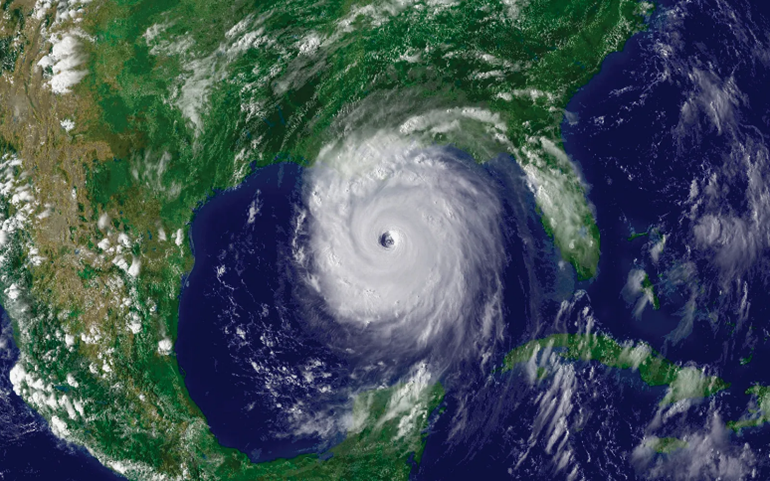

<center> Fig. 1 Image of  Hurricane Katrina on Aug 28 in the Gulf of Mexico.

---
You know the drill by now.

#### Please acknowledge that you understand the instructions by copying and pasting each of the following into the next cells.

#I understand how to save my progress and reopen the notebook.

#I understand that I am being asked to save and submit copies of my notebook as well as a figure of my choice for the assignment.

#I understand that I need to comment my code.

In [1]:
#I understand how to save my progress and reopen the notebook.

In [2]:
#I understand that I am being asked to save and submit copies of my notebook as well as a figure of my choice for the assignment.

In [3]:
#I understand that I need to comment my code.

---
#### Import packages
Let's import the packages we will need. We've used some of them before, but some are new.

Install and import the basemap package into Anaconda and your notebook with the code below:


In [4]:
conda install -c anaconda basemap

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


Sometimes, for basemap to work, you have to restart your kernel. Please do so by clicking the kernel menu above.

In [5]:
#please acknowledge that you've restarted your kernel by adding a comment in the cell below.

In [6]:
#I've done it

In [7]:
#The following is also for needed for plotting SST on a map
#this is new, and we will use it later
# define environment
import os
os.environ["PROJ_LIB"] = os.path.join(os.environ["CONDA_PREFIX"], "share", "proj")
# import basemap
from mpl_toolkits.basemap import Basemap

In [8]:
# import packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import xarray as xr #to examine the .nc file by loading it as an xarray data set

C:\Users\alexa\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


---
## Exercise 1: Hurricane Katrina storm track
Load and assess storm track data file

Windspeed is in knots, pressure is in millibars (mb).

1. Load the storm track file 'Katrina_track.xlsx' and take a look at the file.

2. What is the timestep of the data?

3. How is the structure of this data different from the .nc file?


In [9]:
##1. 
filename = 'Katrina_track.xlsx'
df_track = pd.read_excel(filename) #read in file
df_track #display

,year,month,day,hour,lat,lon,windspeed(knots),pressure(mb)
0,2005,8,23,18,23.1,75.1,30,1008
1,2005,8,24,0,23.4,75.7,30,1007
2,2005,8,24,6,23.8,76.2,30,1007
3,2005,8,24,12,24.5,76.5,35,1006
4,2005,8,24,18,25.4,76.9,40,1003
5,2005,8,25,0,26.0,77.7,45,1000
6,2005,8,25,6,26.1,78.4,50,997
7,2005,8,25,12,26.2,79.0,55,994
8,2005,8,25,18,26.2,79.6,60,988
9,2005,8,26,0,25.9,80.3,70,983


In [10]:
##2. every 6 hrs

##3. just columns of data (1D arrays) instead of a 3D array

---
## Exercise 2: Examine data file for SST pre-Katrina


#### Examine the data structure of the pre-Katrina SST file, sst_mur_20050826.nc

Use the code below to look at the data structure of the pre-Katrina SST file

In [11]:
# examine the data structure of the .nc file by loading it as an xarray dataset

ds = xr.open_dataset('sst_mur_20050826.nc',decode_cf=False) #load
ds #display

<xarray.Dataset>
Dimensions:  (lon: 2001, lat: 1301, time: 1)
Coordinates:
  * lon      (lon) float32 -100.0 -99.99 -99.98 -99.97 ... -80.02 -80.01 -80.0
  * lat      (lat) float32 18.0 18.01 18.02 18.03 ... 30.97 30.98 30.99 31.0
  * time     (time) float32 2.033e+04
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    description:  sst

#### Answer the following questions:

1. How many coordinates does this file have, and what are they?


2. What is the time coordinate of these data? *Hint - we want to know the date, look at the file name.


3. What are the coordinates that define sst?


4. What is the shape of sst? Use the command: ds.sst.shape. Which coordinates are represented by each number in the output of the .shape command? 


5. Click on the page icon to the left of the xarray.Dataset that shows data attributes. What are the units for sst?


In [12]:
##1. There are 3. time, lat, lon

##2. 8/26/2005

##3. time, lat, lon

##4. Using ds.sst.shape
#time is 1, lat is 1301, lon is 2001.

##5. kelvin

In [13]:
ds.sst.shape

# time is 1, lat is 1301, lon is 2001

(1, 1301, 2001)

---
## Exercise 3: Plot pre-Katrina SST

##### Convert from Kelvin to Celcius

Now let's plot a contour map of SST on August 26, 2005, before Katrina hit. To do this, we let's first convert Kelvin to Celsius, so we can read the map more easily.

Celcius = Kelvin - 273.15

One way to do this is to make a 3D array that filled with 273.15, then subtract that array from sst. 

Remember that we can use the np.full() command to create an array with all the same number.

1. Using the 3D shape for SST that we determined in Exercise 2.4, create a 3D array that is filled with 273.15. Name the new array "kelvin"

kelvin = np.full([depth,row,column], fill_value)

2. Use the print command to take a look at "kelvin" to make sure it is correct


In [14]:
##1.
kelvin = np.full([1,1301,2001], 273.15)

In [15]:
##2. look at data
print(kelvin)

[[[273.15 273.15 273.15 ... 273.15 273.15 273.15]
  [273.15 273.15 273.15 ... 273.15 273.15 273.15]
  [273.15 273.15 273.15 ... 273.15 273.15 273.15]
  ...
  [273.15 273.15 273.15 ... 273.15 273.15 273.15]
  [273.15 273.15 273.15 ... 273.15 273.15 273.15]
  [273.15 273.15 273.15 ... 273.15 273.15 273.15]]]


Now we need to subtract kelvin from sst. Execute the command below to do this. Note that our new array is called "sst1".

In [16]:
sst1 = ds.sst[0,:,:] - kelvin[0,:,:] #subtracting

3. What is the shape of sst1? Is it still a 3D array?

In [17]:
sst1.shape

(1301, 2001)

In [18]:
#3. no, 2D

#### Plot SST

Now let's get into the contour plot of SST, which is now our variable "sst1".

We will contour our plot according to "sst1", so let's check out what our min temperature value is so that our contour colors can start at that minimum. The minimum and maximum values of the contour colors are called "color breaks". For our maximum color break color, we will set that to 35 degrees Celcius.

In [19]:
# determine min temp to set min color break
np.nanmin(sst1)

28.547998046875023

Now let's set our color breaks, as well as the interval for the contours, with levs = np.arange()

In [20]:
# set levels of contour according to min and max temp
levs = np.arange(28, 35, 0.05) 

And now let's plot! We'll use our trusty ol' jet colormap and a new command: plt.contourf to plot the contour map.

As discussed in lecture, plt.contourf require an x,y, and z argument. For us, x represents the lon, y represents the lat, and z represents our SST, or "sst1". The z argument must be 2D or be one depth of a 3D array. This is because the contour plot requires an x and y coordinate to plot the contour value. This is exactly what we need, since "sst1" is a 2D plot with lon and lat coordinates. 

Execute the code below:

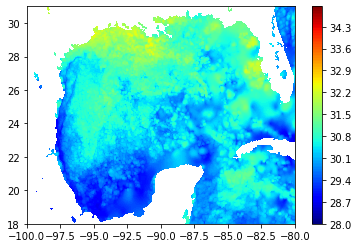

In [21]:
# create contour map of SST pre-Katrina
colormap = 'jet'
plt.contourf(ds.lon, ds.lat, sst1, levs,cmap=colormap) 
plt.colorbar() #display

Ok this looks good, but it would look even better on top of a map!

Let's learn a new package called basemap so we can plot our data onto a background map

---
## Exercise 4: Plot pre-Katrina SST onto a background map

#### Draw basemap

We'll use a series of commands to draw the basemap and then add our contour map to it.

Note that we are using a **Miller cylindrical projection**, but that many projections are available. **Projections** are transformations that allow the curved surface of the globe to be represented on a 2D plane.

Also note the other arguments in the m=Basemap() command. These arguments give the coordinates for where you want your basemap to be drawn.

In our basemap, we use m.drawcoastlines() and m.fillcontinents(), but there are many other geographical features you can draw such as cities, states, rivers, etc.

1. Execute the code below:

{-100: ([<matplotlib.lines.Line2D at 0x1e35abe8160>],
  [Text(2223.897485693624, -22238.974856936235, '100°W')]),
 -95: ([<matplotlib.lines.Line2D at 0x1e35abe83d0>],
  [Text(558198.2689090996, -22238.974856936235, '95°W')]),
 -90: ([<matplotlib.lines.Line2D at 0x1e35abe86a0>],
  [Text(1114172.6403325056, -22238.974856936235, '90°W')]),
 -85: ([<matplotlib.lines.Line2D at 0x1e35abe8970>],
  [Text(1670147.0117559114, -22238.974856936235, '85°W')])}

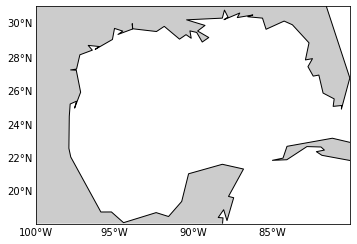

In [22]:
#draw basemap
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=ds.lon.min(), \
  urcrnrlon=ds.lon.max(),llcrnrlat=ds.lat.min(),urcrnrlat=ds.lat.max(), \
  resolution='c') 
m.drawcoastlines() #view the coast
m.fillcontinents() #view the continents
m.drawparallels(np.arange(int(18), int(32), 2), labels = [1, 0, 0, 0], linewidth = 0.0) # draw lat lines
m.drawmeridians(np.arange(int(-100), int(-80), 5), labels = [0, 0, 0, 1], linewidth = 0.0) #draw lon lines


#### Add contour plot to basemap

Now let's add our contour plot to the basemap. 

To do this, we need to create a grid of lats and lons over the basemap. We can do that by creating matrices for lat and lon, then using the np.meshgrid command to create the grid where we can easily plot sst1.

2. Execute the code below:

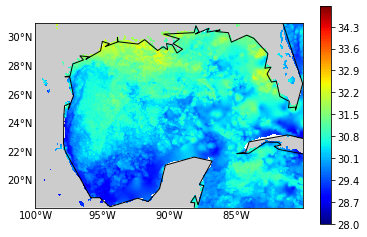

In [23]:
#draw basemap
#same as above
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=ds.lon.min(), \
  urcrnrlon=ds.lon.max(),llcrnrlat=ds.lat.min(),urcrnrlat=ds.lat.max(), \
  resolution='c')
m.drawcoastlines()
m.fillcontinents()
m.drawparallels(np.arange(int(18), int(32), 2), labels = [1, 0, 0, 0], linewidth = 0.0) # draw lat lines from 18 to 32, with a step of 2
m.drawmeridians(np.arange(int(-100), int(-80), 5), labels = [0, 0, 0, 1], linewidth = 0.0) #draw lon lines from -100 to -80 with a step of 5

# create matrices for lon and lat
x = np.linspace(0, m.urcrnrx, sst1.shape[1])
y = np.linspace(0, m.urcrnry, sst1.shape[0])

# create meshgride from the matrices
#for plotting SST
xx, yy = np.meshgrid(x, y) 

#draw the contour map
colormap = 'jet'
m.contourf(xx, yy, sst1, levs,cmap=colormap) 
plt.colorbar() 
plt.show()

#### Limit the map to Northern Gulf of Mexico (NGOM)

Now let's limit our map to the region nearest to us, the NGOM.

To do this, we first need to set new bounds for the basemap. We will look at the region of lon (-93 to -83) and the region of latitude (26,31).

3. Execute the code below to create new bounds.

In [24]:
# create dataFrame
bounds = pd.DataFrame({'lon':[-93,-83],
                   'lat':[26,31]})
# convert to data array
bounds = bounds.to_xarray()

Now that we have these new bounds, we can use:

bounds.lon.min(), bounds.lon.max(), bounds.lat.min(),and bounds.lat.max() 

to limit the basemap to the NGOM. 

We need to enter these bounds as the following variables in the m = Basemap() arguments:

|variable   | description                                                   |
|-----------|---------------------------------------------------------------|
|llcrnrlon  |longitude of lower left hand corner of the desired map domain  |
|urcrnrlon  |longitude of upper right hand corner of the desired map domain |
|llcrnrlat  |latitude of lower left hand corner of the desired map domain   |
|urcrnrlat  |latitude of upper right hand corner of the desired map domain  |

4. Copy and paste the #draw basemap code from Exercise 4.1 or 4.2, and modify the above variables to draw the NGOM basemap. Also change the arguments for int() and the step in m.drawparallels(np.arange()) and m.drawmeridians(np.arange()) so that you have the appropriate latitude and longitude tick marks

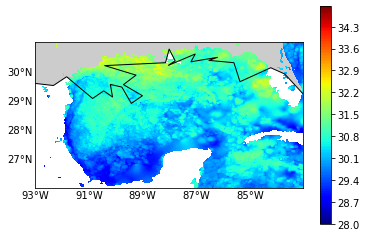

In [25]:
#this is very similar to the above code
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=bounds.lon.min(), \
  urcrnrlon=bounds.lon.max(),llcrnrlat=bounds.lat.min(),urcrnrlat=bounds.lat.max(), \
  resolution='c')
m.drawcoastlines()
m.fillcontinents()
m.drawparallels(np.arange(int(26), int(31), 1), labels = [1, 0, 0, 0], linewidth = 0.0) # draw new lat lines
m.drawmeridians(np.arange(int(-93), int(-83), 2), labels = [0, 0, 0, 1], linewidth = 0.0) #draw new lon lines

# create matrices for lon and lat
x = np.linspace(0, m.urcrnrx, sst1.shape[1])
y = np.linspace(0, m.urcrnry, sst1.shape[0])

# create meshgride from the matrices
#for plotting SST
xx, yy = np.meshgrid(x, y) 

#draw the contour map
colormap = 'jet'
m.contourf(xx, yy, sst1, levs,cmap=colormap) 
plt.colorbar() 
plt.show()

Great. Now we have a basemap for the NGOM. 

#### Limit sst1 for the contour map
We also need to limit sst1 to plot the contour map on our new limited NGOM basemap.

Since we know that the lon and lat lines increase by 0.01, we can which cells of sst1 that we need.

Let's define a new variable, z, that represents the limited sst1 for NGOM.

5. Execute the code below.

6. Check the shape of z. How does it compare the the original shape of sst1?

In [26]:
# create limited sst1 for NGOM
z = sst1[800:1300,700:1700]

In [27]:
z.shape #display shape

(500, 1000)

#### Plot basemap and contour map of NGOM
Great. Now let's run the NGOM basemap with the limited sst1, or z.

Copy and paste your basemap code above the contour map code provided below, and execute.

Note that we also had to change the matrix shapes for x and y, since we needed to make a meshgrid that was the same size as our new variable z, that is a limited portion of sst1. 

7. Copy and paste your basemap code above the contour map code provided below, and execute.

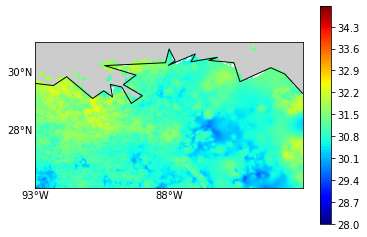

In [28]:
##basemap code below
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=bounds.lon.min(), \
  urcrnrlon=bounds.lon.max(),llcrnrlat=bounds.lat.min(),urcrnrlat=bounds.lat.max(), \
  resolution='c')
m.drawcoastlines()
m.fillcontinents()
m.drawparallels(np.arange(int(26), int(31), 2), labels = [1, 0, 0, 0], linewidth = 0.0) # draw lat lines
m.drawmeridians(np.arange(int(-93), int(-83), 5), labels = [0, 0, 0, 1], linewidth = 0.0) #draw lon lines

# create contour map
# create matrices for lon and lat
x = np.linspace(0, m.urcrnrx, z.shape[1])
y = np.linspace(0, m.urcrnry, z.shape[0])

# create meshgride from the matrices
xx, yy = np.meshgrid(x, y)

# draw the contour map
colormap = 'jet'
m.contourf(xx, yy, z, levs,cmap=colormap) 
plt.colorbar() 
plt.show()

#### Add Hurricane Katrina track to contour plot

Looking good! Now let's add the Hurricane Katrina track to our map using df_track.

Note that the longitudes in df_track are positive. They should actually be negative, so let's change that. 

8. Multiply df_track[lon] by -1 to change it to negative. We started the code for you below:

In [29]:
#make it negative
df_track['lon']=df_track['lon']*-1

Great now let's add the hurricane track to the map. 

9. We'll provide the full basemap and contour map code. Execute the code below and comment the sections that we added to plot the track

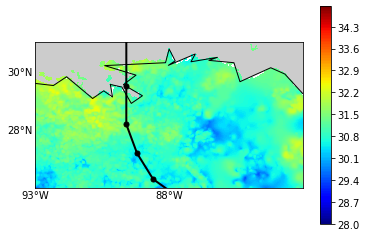

In [30]:
# run map with new bounds
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=bounds.lon.min(), \
  urcrnrlon=bounds.lon.max(),llcrnrlat=bounds.lat.min(),urcrnrlat=bounds.lat.max(), \
  resolution='c')
a, b = m(df_track['lon'], df_track['lat'])
m.plot(a, b, 'o-', color = 'k', markersize=5, linewidth=2) 
m.drawcoastlines() 
m.fillcontinents()
m.drawparallels(np.arange(int(26), int(31), 2), labels = [1, 0, 0, 0], linewidth = 0.0) # draw lat lines
m.drawmeridians(np.arange(int(-93), int(-83), 5), labels = [0, 0, 0, 1], linewidth = 0.0) #draw lon lines

# create matrices for lon and lat
x = np.linspace(0, m.urcrnrx, z.shape[1])
y = np.linspace(0, m.urcrnry, z.shape[0])

xx, yy = np.meshgrid(x, y)

colormap = 'jet'
m.contourf(xx, yy, z, levs,cmap=colormap) 
plt.colorbar() 
plt.show()

Great, that looks nice. Now let's answer some questions about SST pre-Katrina:

10. What is the temperature range over the subregion of the Gulf of Mexico?


11. What is the SST around the track of Hurricane Katrina? Where is it highest?


12. Hurricanes can typically sustain their strength or intensity if the SST is above 26 degrees C. As Hurricane Katrina crossed this section of the Gulf of Mexico, how would you expect the strength of the storm to response to these oceanic conditions?

In [31]:
##10. ~28.5 to 32.5 so range of about 4 C

##11. crosses ocean at around 31-32 C

##12. storm should strengthen or be sustained

---
## Exercise 5: What was going on with the Hurricane during this time?


Hurricane Katrina was passing over this region of the Gulf from Aug 27 to Aug 28. Let's examine how the wind speed and pressure change during this time.


#### Plot characteristics of the hurricane over time
Let's look at changes in wind speed and pressure of the hurricane over the entire time series.

First let's refresh our memory of the Hurricane data file, df_track

In [32]:
# Look at df_track
df_track

,year,month,day,hour,lat,lon,windspeed(knots),pressure(mb)
0,2005,8,23,18,23.1,-75.1,30,1008
1,2005,8,24,0,23.4,-75.7,30,1007
2,2005,8,24,6,23.8,-76.2,30,1007
3,2005,8,24,12,24.5,-76.5,35,1006
4,2005,8,24,18,25.4,-76.9,40,1003
5,2005,8,25,0,26.0,-77.7,45,1000
6,2005,8,25,6,26.1,-78.4,50,997
7,2005,8,25,12,26.2,-79.0,55,994
8,2005,8,25,18,26.2,-79.6,60,988
9,2005,8,26,0,25.9,-80.3,70,983


#### Convert to datetime

Remember have to first convert combine the date and time columns into a single datetime by creating a new dataframe then using the pd.to_datetime command. 

1. Fill in the column names to create df_date

In [33]:
# create new dataframe with all date and time columns
df_date = df_track[['', '', '', '', '']]

KeyError: "None of [Index(['', '', '', '', ''], dtype='object')] are in the [columns]"

In [34]:
#flled in arguments with appropriate columns
df_date = df_track[['year', 'month', 'day', 'hour']]
df_date

,year,month,day,hour
0,2005,8,23,18
1,2005,8,24,0
2,2005,8,24,6
3,2005,8,24,12
4,2005,8,24,18
5,2005,8,25,0
6,2005,8,25,6
7,2005,8,25,12
8,2005,8,25,18
9,2005,8,26,0


2. Now run the code below to create a datetime called track_date

In [35]:
# create track_date
track_date = pd.to_datetime(df_date)
track_date #display

0    2005-08-23 18:00:00
1    2005-08-24 00:00:00
2    2005-08-24 06:00:00
3    2005-08-24 12:00:00
4    2005-08-24 18:00:00
5    2005-08-25 00:00:00
6    2005-08-25 06:00:00
7    2005-08-25 12:00:00
8    2005-08-25 18:00:00
9    2005-08-26 00:00:00
10   2005-08-26 06:00:00
11   2005-08-26 12:00:00
12   2005-08-26 18:00:00
13   2005-08-27 00:00:00
14   2005-08-27 06:00:00
15   2005-08-27 12:00:00
16   2005-08-27 18:00:00
17   2005-08-28 00:00:00
18   2005-08-28 06:00:00
19   2005-08-28 12:00:00
20   2005-08-28 18:00:00
21   2005-08-29 00:00:00
22   2005-08-29 06:00:00
23   2005-08-29 12:00:00
24   2005-08-29 18:00:00
25   2005-08-30 00:00:00
26   2005-08-30 06:00:00
27   2005-08-30 12:00:00
28   2005-08-30 18:00:00
29   2005-08-31 00:00:00
30   2005-08-31 06:00:00
dtype: datetime64[ns]

#### Plot wind speed over the course of the time series

Let's first convert knots to miles per hour.

1 knot = 1.15 miles per hour

3. Using the the above equation, make a variable called "mph" that converts the "windspeed(knots)" to miles per hour

4. Plot windspeed using your new "mph" variable with the command plt.plot(). Include an x axis label and a title. *Remember the command to rotate tick labels is plt.xticks(rotation = 45)

In [36]:
#converting windspeed units
mph = df_track['windspeed(knots)']*1.15
mph #display

0      34.50
1      34.50
2      34.50
3      40.25
4      46.00
5      51.75
6      57.50
7      63.25
8      69.00
9      80.50
10     74.75
11     86.25
12     97.75
13    103.50
14    109.25
15    115.00
16    115.00
17    115.00
18    143.75
19    166.75
20    172.50
21    161.00
22    143.75
23    126.50
24     92.00
25     57.50
26     46.00
27     34.50
28     34.50
29     34.50
30     28.75
Name: windspeed(knots), dtype: float64

Text(0.5, 1.0, 'Windspeed of Hurricane Katrina')

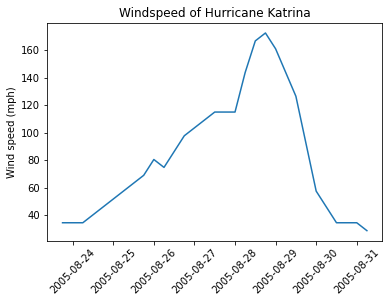

In [37]:
#plot
plt.plot(track_date, mph)
plt.ylabel('Wind speed (mph)') #y-axis label
plt.xticks(rotation = 45) #xaxis data label rotation
plt.title('Windspeed of Hurricane Katrina') #title

#### Assess windspeed from Aug 27 to Aug 28

5. Based on wind speed, did the storm weaken or intensify from Aug 27 to Aug 28?


6. How much did the wind speed change?

In [38]:
##5. Intensify

##6. About 98 to 172mph

#### Plot pressure change over the Hurricane time series
Let's take a look at pressure

7. Plot the pressure of the Hurricane over the time series. Include an x axis label and a title.

Text(0.5, 1.0, 'Pressure of Hurricane Katrina')

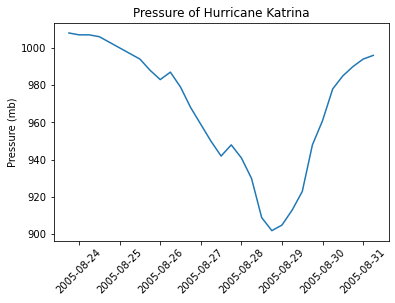

In [39]:
plt.plot(track_date, df_track['pressure(mb)']) #plot
plt.ylabel('Pressure (mb)') #y-axis label
plt.xticks(rotation = 45) #rotate label 
plt.title('Pressure of Hurricane Katrina') #title

8. What was the pressure change from Aug 27 to Aug 28?


9. Normal atmospheric pressure is around 1013 mb, with positive or negative changes of around 10 mb. Was the pressure change from Aug 27 to Aug 28 normal? If not, how much greater was the pressure change?

In [40]:
##8. 959 to 902 mb

##9. 10 times greater than normal

---
## Exercise 6: SST post-Katrina

Now let's look at the change in SST conditions after the storm had passed. For a post-storm assessment, we can look at Aug 31, which was about 2 days after the initial landfall of Hurricane Katrina. 

#### Read in post-Katrina SST file

Read in the Aug 31 data file using the same method as for the Aug 26 data file in Exercise 2.

1. Read in 'sst_mur_20050831.nc'. Name the dataset "ds2"


2. Open "ds2" by simply typing it into the code cell and take a look at the attributes.


3. What is the shape of "sst" in "ds2"? Is the the same as "sst" from Aug 26?


In [41]:
ds2 = xr.open_dataset('sst_mur_20050831.nc',decode_cf=False) #read in

In [42]:
ds2 #display

<xarray.Dataset>
Dimensions:  (lon: 2001, lat: 1301, time: 1)
Coordinates:
  * lon      (lon) float32 -100.0 -99.99 -99.98 -99.97 ... -80.02 -80.01 -80.0
  * lat      (lat) float32 18.0 18.01 18.02 18.03 ... 30.97 30.98 30.99 31.0
  * time     (time) float32 2.033e+04
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    description:  sst

In [43]:
#3. 
ds2.sst.shape

(1, 1301, 2001)

##### Convert from Kelvin to Celcius

Now let's do the same steps for Aug 31 as we did for Aug 26:

Celcius = Kelvin - 273.15

Since the shape of "sst" is the same for Aug 31 as Aug 26, we can use the same "kelvin" array we used for Exercise 2.

4. Subtract the "kelvin" array from "sst" for Aug 31, call it "sst2". Remember to change what you need to when you copy/paste the code from Exercise 3.

In [44]:
sst2= ds2.sst[0,:,:] - kelvin[0,:,:] #subtracting

#### Determine contour breaks
Look back at Exercise 3 to complete the next questions.

5. What is the min temperature of sst2? We will use that for the min contour break.


6. Set the levels for the contour breaks and the interval. Use the same max contour break and interval as for Exercise 3. 

In [45]:
np.nanmin(sst2) #display min

26.443994140625023

In [46]:
levs = np.arange(26, 35, 0.05) #set levels

#### Create the NGOM-limited array for SST
We need to limit these data to the NGOM too, like we did for the pre-Katrina data.

Let's call this post-Katrina SST "z2".

7. Copy and paste the code from Exercise 4.6 to create a post-Katrina SST array that is limited to the NGOM, but call it "z2". Be sure to call **post**-Katrina SSt array, not the pre-Katrina SST array. 


In [47]:
z2 = sst2[800:1300,700:1700] #create array

#### Plot post-Katrina SST

8. Plot post-Katrina SST! Copy and paste the code from Exercise 4.9, but plot z2 instead of z. 

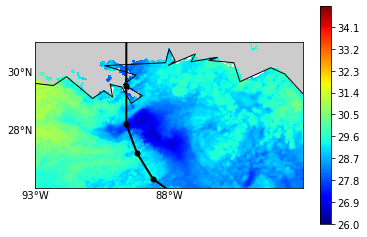

In [48]:
# run map with new bounds
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=bounds.lon.min(), \
  urcrnrlon=bounds.lon.max(),llcrnrlat=bounds.lat.min(),urcrnrlat=bounds.lat.max(), \
  resolution='c')
a, b = m(df_track['lon'], df_track['lat'])
m.plot(a, b, 'o-', color = 'k', markersize=5, linewidth=2) 
m.drawcoastlines() 
m.fillcontinents()
m.drawparallels(np.arange(int(26), int(31), 2), labels = [1, 0, 0, 0], linewidth = 0.0) # draw lat lines
m.drawmeridians(np.arange(int(-93), int(-83), 5), labels = [0, 0, 0, 1], linewidth = 0.0) #draw lon lines

# create matrices for lon and lat
x = np.linspace(0, m.urcrnrx, z2.shape[1])
y = np.linspace(0, m.urcrnry, z2.shape[0])

#create meshgrid
xx, yy = np.meshgrid(x, y)

#plot
colormap = 'jet'
m.contourf(xx, yy, z2, levs,cmap=colormap) 
plt.colorbar() 
plt.show()

#### Assess post-Katrina SST

8. What is the temperature range over this subregion of the Gulf of Mexico after the storm has passed? 

9. How does the temperature range compare to before the storm had passed?


10. How does the SST by the storm track compare with the SST in other areas?


11. Is the spatial structure of the SST what you would expect after a hurricane has passed through? Why?

In [49]:
##8. 26.5- 31.5  - Range of ~5oC

##9. It's a larger range because it got colder. 

##10. The coldest temperatures are to the right of the storm track.

##11. Expect cooling during a hurricane due to increased heat fluxes (from high winds) 
#as well as from mixing of colder deeper water to the surface.
#Storms are typically better mixers than heat removers.  
#Strongest area of storms is typically the northeast quadrant 
#so they should generate the most mixing (forward speed of the storm couples with the spin of the storm).
#An additional boost is to the mixing maximum because the spin on the right side excites near-inertia oscillations 


---
## Exercise 7: Basic Calculations

To better quantify the impact of a hurricane on the ocean, let's calculate the difference in ocean conditions before and after the storm event. To do this, we will look at the broad scale picture of the regional changes and compare the SST changes to other ocean features.

### Compute the change that has occurred of the subregion of the Gulf of Mexico





#### Using figure of SST to answer these questions:

1. What is the range of temperature differences over this subregion of the Gulf of Mexico?


#### Let’s compare these changes to the behavior of the storm. 


2. Where the storm rapidly intensified (Aug 27-28), how much did the SST change?  Look at the region east of the track between 26-28°N.


3. Where the storm rapidly weakened, going from a Cat 5 to a Cat 3 on Aug 29, how much did the SST change? Look at the region west of the track between 28-29°N.


4. What to this indicate about the importance of SST on hurricane strength?


In [50]:
##1. ~0-5°C 

##2. <1°C 

##3. <4-5°C

##4. Areas with more significant cooling are less favorable for hurricane intensification.

#### Compare these changes in SST with oceanic features

Changes in the SST are affected by the subsurface structure of the ocean. The image below shows features in the Gulf of Mexico during the passage of Hurricane Katrina (Fig. 2). The dynamic height of the topography of the ocean can be thought of as the subtle hills and valleys of the ocean surface. The image below is produced from a satellite sensor call an altimeter which measures height of the ocean surface from which can calculate geographic currents.

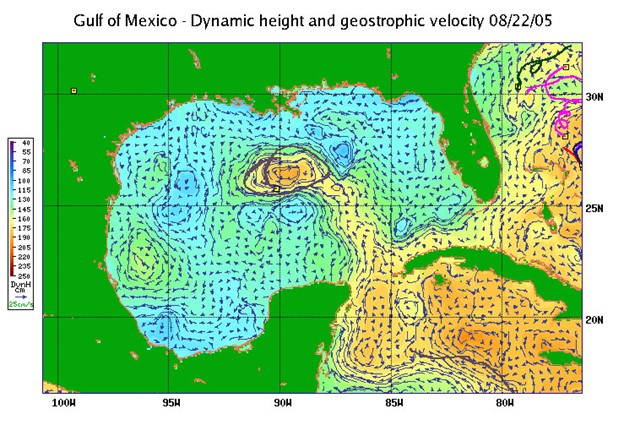

<center>Fig 2: Sea surface feature approximately 5 days before Hurricane Katrine entered the Gulf of Mexico. Image courtesy of NASA. 

1. Look at the features associated with the subregions of SST data that we have been examining. What do you see?


2. What is the relative SST temperature change over these features? 


3. These features are called rings or eddies (look at the circular nature of the geostrophic currents associated with each). What does the spatial structure of SST change suggest about the subsurface conditions under these eddy features?  

In [51]:
##1. There is an area of elevation and an area of depression. 

##2. The high elevation had small temperature change and an area of depression had large temperature change

##3. Deeper layer warm water under the high elevation area (i.e. warm core ring) 
#and shallow layer of warm water under the depression (cold core ring).  
#i.e. mixing is not as effective at reducing the SST in the elevated area 
#because of the  subsurface thermal structure (i.e. thick warm layer). 

#### You did it!!

In summary, there is a significant connection between storm intensity and SST, and changes in SST are directly related to the subsurface ocean structure. So storm intensity is linked to ocean structure! And so as we get more information on subsurface ocean conditions, better hurricane forecasts are expected to follow. 


Please submit the assignment as asked to Canvas! 